# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?


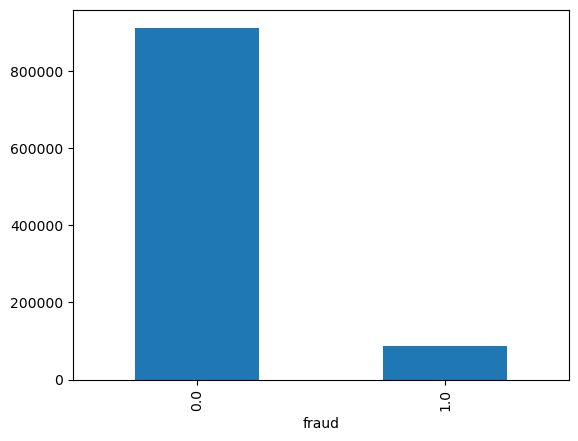

In [6]:
fraud = df['fraud'].value_counts()
fraud.plot(kind='bar')
plt.show()

The dataset is very, very imbalance, with there being far more legitimate transactions than fraudulent transactions. 

- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.

In [8]:
# Establish features and target
features = df.drop(columns= ['fraud'])
target = df['fraud']

# Separate test and train groups for features and target
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=8675309)

# Set scaler
scaler = StandardScaler()
scaler.fit(X_train)

# Scale data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save model as object for use
log_reg = LogisticRegression()

# fit training data to logistic regression
log_reg.fit(X_train_scaled, y_train)

# fit test data to logistic regression
log_reg.score(X_test_scaled, y_test)

# predicts outcomes for X_test_scaled, saves as pred object
pred = log_reg.predict(X_test_scaled)

# prints a report on the model
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228140
         1.0       0.90      0.60      0.72     21860

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.96    250000



The model is good at predicting when a transaction is legitimate, but is less good at detecing fraudulent transactions. 

- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 


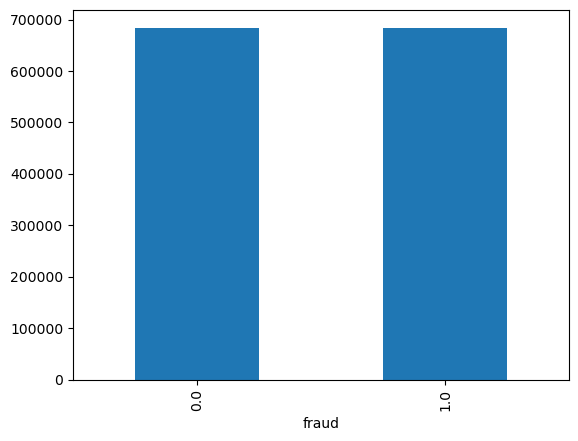

c:\Users\bfran\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228140
         1.0       0.57      0.95      0.71     21860

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [10]:
# creates train object out of scaled training features with the same columns
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)

# merges target training column back into dataframe
train["fraud"] = y_train.values

# create subsets of legitimate and fraudulent transactions 
legit = train[train['fraud'] == 0]
fraud = train[train['fraud'] == 1]

# oversamples fraud subset to be as long as the legit subset
# allows for use of same observation multiple time
# sets random state
fraud_o = resample(fraud,
                   replace=True,
                   n_samples=len(legit),
                   random_state=8675309)

# Concatenates oversampled fraud subset with regular legit subset
o_train = pd.concat([legit, fraud_o])

# Creates and shows a plot to show that the counts of fraudulent and legitimate transactions are now equal
o_plt = o_train['fraud'].value_counts()
o_plt.plot(kind = 'bar')
plt.show()

OX_train = o_train.drop(columns = ['fraud'])
Oy_train = o_train['fraud']

# fit oversampled training data to logistic regression
log_reg.fit(OX_train, Oy_train)

# fit test data to logistic regression
log_reg.score(OX_train, Oy_train)

# predicts outcomes for X_test_scaled, saves as pred object
pred = log_reg.predict(X_test_scaled)

# prints a report on the model
print(classification_report(y_pred = pred, y_true = y_test))

Original:

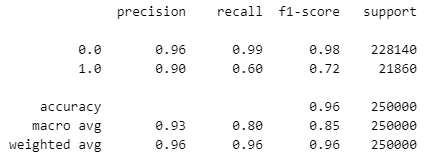

Our precision is down, but our recall is much higher, with f-1 being about the same. 

- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?

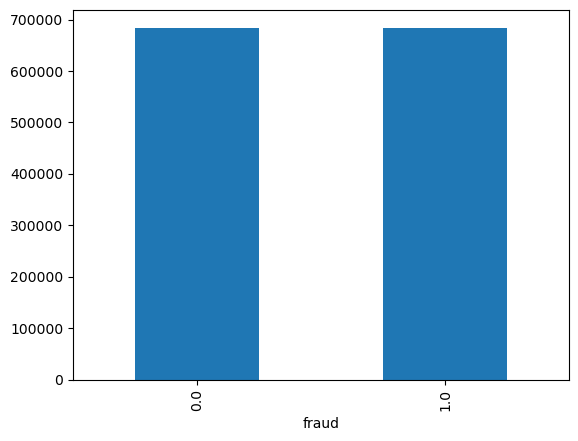

c:\Users\bfran\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228140
         1.0       0.58      0.95      0.72     21860

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [11]:
# undersamples legit subset to be as long as the fraud subset
# allows for use of same observation multiple time
# sets random state
legit_u = resample(legit,
                   replace=True,
                   n_samples=len(fraud),
                   random_state=8675309)

# Concatenates oversampled legit subset with regular fraud subset
u_train = pd.concat([legit_u, fraud])

# Creates and shows a plot to show that the counts of fraudulent and legitimate transactions are now equal
u_plt = o_train['fraud'].value_counts()
u_plt.plot(kind = 'bar')
plt.show()

UX_train = u_train.drop(columns = ['fraud'])
Uy_train = u_train['fraud']

# fit oversampled training data to logistic regression
log_reg.fit(UX_train, Uy_train)

# fit test data to logistic regression
log_reg.score(UX_train, Uy_train)

# predicts outcomes for X_test_scaled, saves as pred object
pred = log_reg.predict(X_test_scaled)

# prints a report on the model
print(classification_report(y_pred = pred, y_true = y_test))

Original:

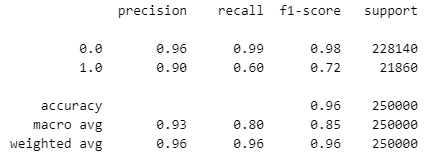

Oversampled:

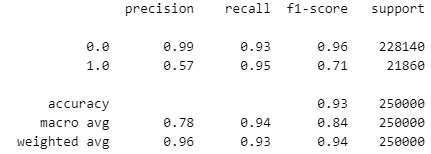

So the Undersampled data is only slightly better than the Oversampled. 

- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [15]:
# create SMOTE model, set random state
sm = SMOTE(random_state = 8675309,sampling_strategy=1.0)

# resamples data using smote model
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

# Trains regression model again
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

# sets prediction, tests model and prints results
pred = log_reg.predict(X_test_scaled)
print('SMOTE:')
print(classification_report(y_pred = pred, y_true = y_test))

SMOTE:
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228140
         1.0       0.57      0.95      0.72     21860

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



Undersampled:

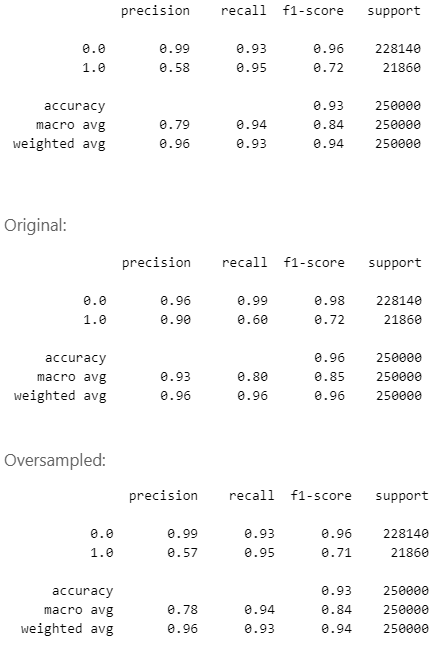

Unfortunately, all of these models seems to have performed roughly the same (aside from the original). The undersampled model, however, is slightly better on precision and f-1 score, making it marginally the best model. Each of the models differs from the original by being less precise but having a higher recall. 